<a href="https://colab.research.google.com/github/te19oishi/colab/blob/main/chap5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.matlib as mlb
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.fftpack as sfft
import cv2
!pip install simpleaudio
import cis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


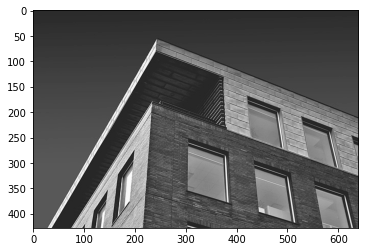

In [ ]:
G=cv2.imread('building-1081868_640.jpg',0)
plt.imshow(G,cmap='gray')
plt.show()

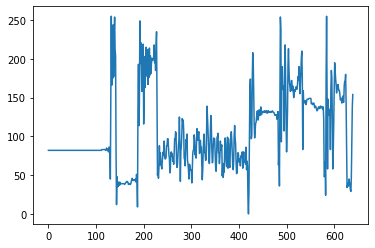

In [ ]:
plt.plot(G[250,:])
plt.show()

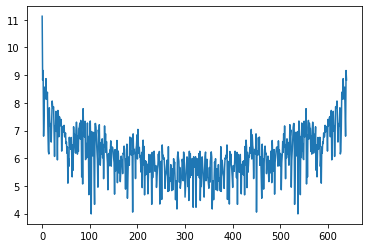

In [ ]:
plt.plot(np.log(np.abs(sfft.fft(G[250,:]))))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



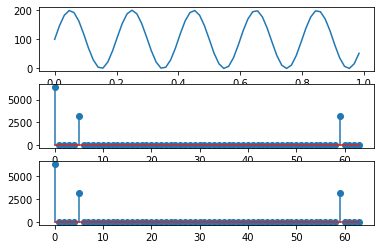

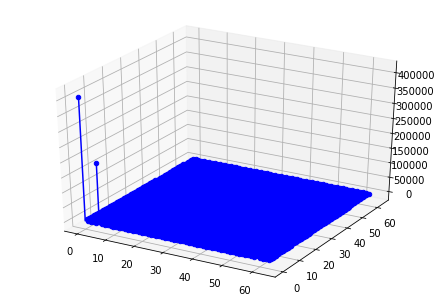

In [ ]:
h,w=64,64
x=np.array([np.arange(0,1,1/h)]).T
G=mlb.repmat(np.uint8(100*(np.sin(2*np.pi*5*x)+1)),1,w)
plt.subplot(311); plt.plot(x,G[:,0])
plt.subplot(312); plt.stem(np.abs(sfft.fft(G[:,0])))
S=sfft.fft(G,axis=0)
plt.subplot(313); plt.stem(np.abs(S[:,0]))
plt.show()
S2=sfft.fft(S,axis=1)
cis.stem3(np.abs(S2))

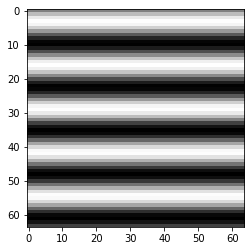

In [ ]:
h,w=64,64
x=np.array([np.arange(0,1,1/h)]).T
G=mlb.repmat(np.uint8(100*(np.sin(2*np.pi*5*x)+1)),1,w)
plt.imshow(G,cmap='gray')

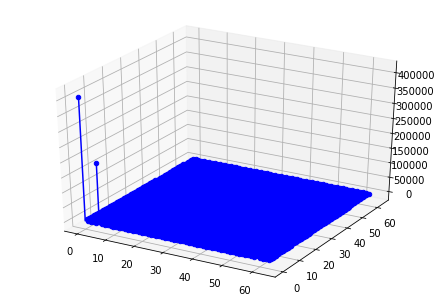

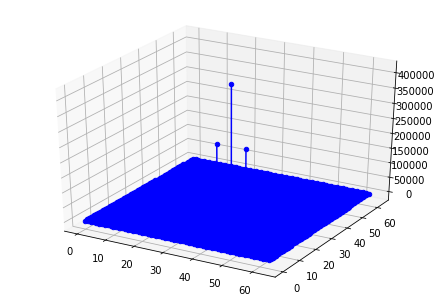

In [ ]:
Z2=sfft.fft2(G)
cis.stem3(np.abs(Z2))
cis.stem3(np.abs(sfft.fftshift(Z2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



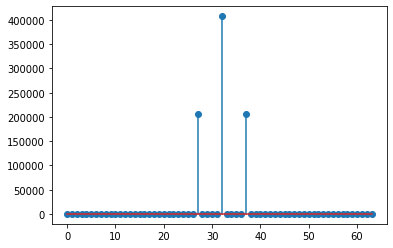

In [ ]:
Z2shift=sfft.fftshift(Z2)
plt.stem(np.abs(Z2shift[:,32]))
plt.show()

In [ ]:
fs=8000
t=np.arange(0,1,1/fs)
y=np.sin(2*np.pi*440*t)+np.sin(2*np.pi*660*t)
fftlen=256
noverlap=128
S,_,_=mlab.specgram(y,Fs=fs,NFFT=fftlen,window=np.hanning(fftlen),
                noverlap=noverlap,mode='complex',sides='twosided')
S=sfft.fftshift(S,axes=0)
slen=S.shape[1]
ry=np.zeros(slen*fftlen-(slen-1)*noverlap)
cutoff=500
cind=int(cutoff/(fs/fftlen))
F=np.ones((fftlen,1))
F[cind:-cind]=0
S=S*F
k1=0
for k in range(0,slen):
  ry[k1:k1+fftlen]=ry[k1:k1+fftlen]+np.real(sfft.ifft(S[:,k]))
k1=k1+noverlap

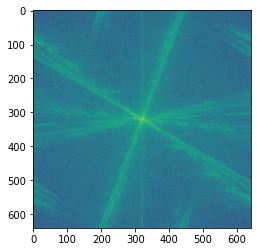

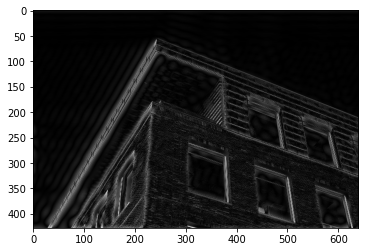

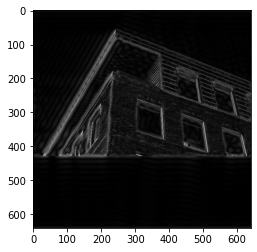

In [ ]:
G=cv2.imread('building-1081868_640.jpg',0)
h,w=G.shape
fftsize=max(G.shape)
F=np.ones((fftsize,fftsize))
wlen=20
ctr=int(fftsize/2)
p1=ctr-wlen
p2=ctr+wlen
F[p1:p2,p1:p2]=0
Z=sfft.fftshift(sfft.fft2(G,(fftsize,fftsize)))
plt.imshow(np.log(np.abs(Z)))
plt.show()
fG=np.uint8(np.abs(sfft.ifft2(sfft.fftshift(Z*F))))
plt.imshow(fG[:h,:w],cmap='gray')
plt.show()
plt.imshow(fG,cmap='gray')
plt.show()

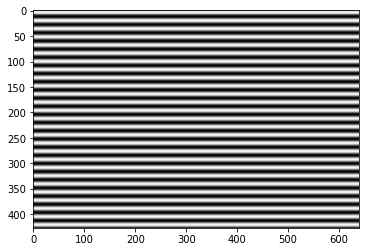

In [ ]:
G=cv2.imread('cyclist-394274_640.jpg',0)
h,w=G.shape
x=np.array([np.arange(0,1,1/h)]).T
hp=mlb.repmat(np.uint8(16*(np.sin(2*np.pi*h/16*x)+1)),1,w)
plt.imshow(hp,cmap='gray')

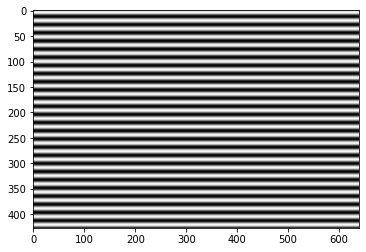

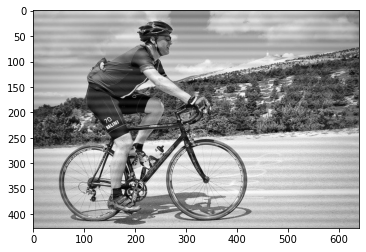

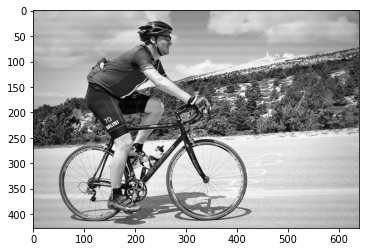

In [ ]:
G=cv2.imread('cyclist-394274_640.jpg',0)
h,w=G.shape
fftsize=max(h,w)
x=np.array([np.arange(0,1,1/h)]).T
hp=mlb.repmat(np.uint8(16*(np.sin(2*np.pi*h/16*x)+1)),1,w)
plt.imshow(np.uint8(hp)*np.mean(G),cmap='gray')
plt.show()
x1=np.uint8((np.float16(G)+np.float16(hp))/(float(np.max(G))+float(np.max(hp)))*255)
plt.imshow(x1,cmap='gray')
plt.show()
z=sfft.fftshift(sfft.fft2(x1,(fftsize,fftsize)))
#cis.mesh(np.log(np.abs(z)))
A=np.ones((fftsize,fftsize))
A[358:363,320]=0
A[278:283,320]=0
#cis.mesh(np.log(np.abs(z*A)))
G2=np.uint8(np.abs(sfft.ifft2(sfft.fftshift(z*A))))
plt.imshow(G2[:h,:w],cmap='gray')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

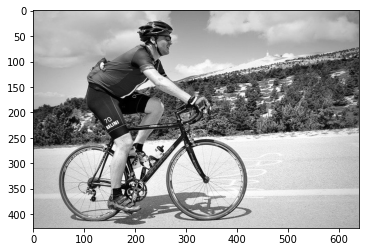

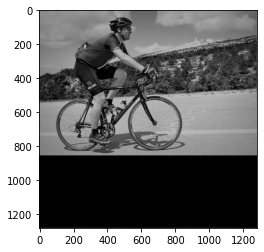

<function matplotlib.pyplot.show>

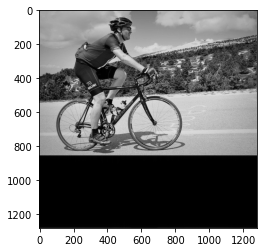

In [ ]:
G=cv2.imread('cyclist-394274_640.jpg',0)
fftsize=max(G.shape)
z=sfft.fftshift(sfft.fft2(G,(fftsize,fftsize)))
targetsize=fftsize*2
A=np.zeros((targetsize,targetsize),dtype=complex)
ctr=targetsize/2
c1=np.int(ctr-fftsize/2)
c2=np.int(ctr+fftsize/2)
A[c1:c2,c1:c2]=z
fQ=sfft.ifft2(sfft.fftshift(A))
plt.imshow(G,cmap='gray')
plt.show()
plt.imshow(np.uint8(np.abs(fQ)),cmap='gray')
plt.show()
plt.imshow(np.uint8(np.clip(np.abs(fQ)*3.5,0,255)),cmap='gray')
plt.show